# RBDS compare processed files

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

This NB compares the processed files that are in Figshare with the ones that were generated now.

In [1]:
# Prepare environment
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [14]:
# Figshare old files local directory
figshare_dir_old = r'C:\Users\Reginaldo\Documents\data\CNPq\RBDS_v2\Figshare'
fnames = glob.glob(os.path.join(figshare_dir_old,'RBDS*processed.txt'))

nsubjects = len(fnames)
print(str(nsubjects) + ' subjects')

28 subjects


In [20]:
sub_ids = [fname[-20:-13] for fname in fnames]
print(sub_ids)

['RBDS001', 'RBDS002', 'RBDS003', 'RBDS004', 'RBDS005', 'RBDS006', 'RBDS007', 'RBDS008', 'RBDS009', 'RBDS010', 'RBDS011', 'RBDS012', 'RBDS013', 'RBDS014', 'RBDS015', 'RBDS016', 'RBDS017', 'RBDS018', 'RBDS019', 'RBDS020', 'RBDS021', 'RBDS022', 'RBDS023', 'RBDS024', 'RBDS025', 'RBDS026', 'RBDS027', 'RBDS028']


### Metadata file of the existing dataset

In [11]:
info = pd.read_csv(os.path.join(r'../data','RBDSinfo.txt'), 
                   delimiter='\t', index_col='Subject')
info.head()

,FileName,Age,Height,Mass,Gender,Dominance,Level,Experience,SessionsPerWk,Treadmill,...,LThomas,ROber,LOber,RHIPABD,LHIPABD,RHIPEXT,LHIPEXT,RHIPER,LHIPER,RHIPIR
Subject,,,,,,,,,,,,,,,,,,,,,
1,RBDS001static.txt,22,181.0,62.0,M,R,Competitive,4,3,0,...,11,43,40,16.8,21.575,16.575,21.675,9.666667,7.25,10.966667
1,RBDS001runT25markers.txt,22,181.0,62.0,M,R,Competitive,4,3,0,...,11,43,40,16.8,21.575,16.575,21.675,9.666667,7.25,10.966667
1,RBDS001runT25forces.txt,22,181.0,62.0,M,R,Competitive,4,3,0,...,11,43,40,16.8,21.575,16.575,21.675,9.666667,7.25,10.966667
1,RBDS001runT35markers.txt,22,181.0,62.0,M,R,Competitive,4,3,0,...,11,43,40,16.8,21.575,16.575,21.675,9.666667,7.25,10.966667
1,RBDS001runT35forces.txt,22,181.0,62.0,M,R,Competitive,4,3,0,...,11,43,40,16.8,21.575,16.575,21.675,9.666667,7.25,10.966667


Column headers of RBDS Figshare
['FileName', 'Age', 'Height', 'Mass', 'Gender', 'Dominance', 'Level', 'Experience', 'SessionsPerWk', 'Treadmill', 'Aslphalt', 'Grass', 'Trail', 'Sand', 'Concrete', 'SurfaceAlt', 'RunGrp', 'Volume', 'Pace', 'RaceDist', 'Injury', 'InjuryLoc', 'DiagnosticMed', 'Diagnostic', 'InjuryOnDate', 'ShoeSize', 'ShoeBrand', 'ShoeModel', 'ShoePairs', 'ShoeChange', 'ShoeComfort', 'ShoeInsert', 'RFSI25', 'RFSI35', 'RFSI45', 'LFSI25', 'LFSI35', 'LFSI45', 'RThomas', 'LThomas', 'ROber', 'LOber', 'RHIPABD', 'LHIPABD', 'RHIPEXT', 'LHIPEXT', 'RHIPER', 'LHIPER', 'RHIPIR']


In [43]:
fname_q= os.path.join(r'../data', 'RBDS_google_forms.csv') 
# Import data
info2 = pd.read_csv(fname_q, sep = ',', index_col = 'ID')
# Update df with s041 onwards
info2 = info2.iloc[int(np.where(info2.index=='BMC0041')[0][0]):,:]
info2.head()

,Timestamp,Primeiro nome,Último nome,E-mail,Data de nascimento,Altura (cm),Massa (kg),Gênero,Membro inferior dominante,Qual é o seu desempenho na corrida?,...,Caso tenha respondido sim na questão anterior,Data aproximada do inicio dos sintomas,"Quando você corre, os sintomas ocorrem...",Número do tênis de corrida,Marca do calçado,Modelo do calçado,Número de pares,Com que frequência você substitui os ses tênis?,Indique o nível de conforto do seu tênis de corrida atual,Você utiliza algum objeto dentro do tênis?
ID,,,,,,,,,,,,,,,,,,,,,
BMC0041,1/19/2017 13:15:14,Adilson,de Oliveira,adilson.oli@hotmail.com,5/17/1983,168.5,63.10,Masculino,Direito,Competitivo,...,NaN,NaN,NaN,9,Nike,Streaker Air zoom 6,1,Entre 7 meses e 1 ano,8,Nenhum
BMC0042,3/10/2017 10:18:07,Douglas,Andrighetti,douglasef@gmail.com,4/5/1984,181.2,75.35,Masculino,Direito,Competitivo,...,"Tendinite t calcâneo D, fasceíte plantar E",9/1/2016,Em todos os passos da corrida,US 9.5,Asics,Nimbus 17,2,Entre 7 meses e 1 ano,8,Nenhum
BMC0043,4/20/2017 16:14:34,Marcos Vinícius,Temple,marcostemple23@gmail.com,5/23/1997,176.5,64.70,Masculino,Direito,Apenas recreacional,...,NaN,NaN,NaN,9.5,Nike,Air Relentless4,1,Entre 7 meses e 1 ano,10,Nenhum
BMC0044,6/7/2017 16:02:06,Paulo,Abreu,shirotri@hotmail.com,6/7/1976,177.2,78.30,Masculino,Direito,Competitivo,...,NaN,NaN,NaN,10.5,Nike,Pegasus,3,Menos de 6 meses,8,Nenhum
BMC0045,7/11/2017 14:06:09,Taiguara,Silva,tai.ortiz@gmail.com,3/13/1986,176.7,101.30,Masculino,Direito,Recreacional competitivo,...,Fasceíte plantar D,11/1/2016,Somente no fim da corrida ou no dia seguinte,US 10,Asics,Contend 3A,1,Menos de 6 meses,7,Palmilhas


In [44]:
print('Column headers of RBDS Figshare')
print(info.columns.tolist())

Column headers of RBDS Figshare
['FileName', 'Age', 'Height', 'Mass', 'Gender', 'Dominance', 'Level', 'Experience', 'SessionsPerWk', 'Treadmill', 'Aslphalt', 'Grass', 'Trail', 'Sand', 'Concrete', 'SurfaceAlt', 'RunGrp', 'Volume', 'Pace', 'RaceDist', 'Injury', 'InjuryLoc', 'DiagnosticMed', 'Diagnostic', 'InjuryOnDate', 'ShoeSize', 'ShoeBrand', 'ShoeModel', 'ShoePairs', 'ShoeChange', 'ShoeComfort', 'ShoeInsert', 'RFSI25', 'RFSI35', 'RFSI45', 'LFSI25', 'LFSI35', 'LFSI45', 'RThomas', 'LThomas', 'ROber', 'LOber', 'RHIPABD', 'LHIPABD', 'RHIPEXT', 'LHIPEXT', 'RHIPER', 'LHIPER', 'RHIPIR']


In [ ]:
col_labels = ['Data de nascimento','Altura (cm)','Massa (kg)','Gênero','Membro inferior dominante',
              'Qual é o seu desempenho na corrida?','Quanto tempo (em meses) você tem praticado corrida de rua regularmente?',
             'Quantas vezes por semana você pratica corrida?','Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Esteira]',
             'Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Asfalto]',
              'Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Grama]',
             'Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Terra]',
             'Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Areia]',
             'Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Concreto]',
             'Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Outro]',
              'Participante de grupo (assessoria) de corrida?','Indique a sua quilometragem semanal?',
              'Qual foi o seu pace médio (min/km) nas últimas provas?',
              'Qual (is) é (são) o (s) tipo (s) de prova que você realizada ultimamente?',
              'Você apresentou lesão (ou dor) em decorrência da prática de corrida que tenha te afastado pelo menos de um treino/prova?',
              'Localização anatômica da lesão', 'Houve diagnóstico nosológico?', 'Caso tenha respondido sim na questão anterior',
              'Data aproximada do inicio dos sintomas', 'Número do tênis de corrida', 'Marca do calçado', 'Modelo do calçado',
              'Número de pares', 'Com que frequência você substitui os ses tênis?', 'Indique o nível de conforto do seu tênis de corrida atual',
              'Você utiliza algum objeto dentro do tênis?']

## Search m files in MAtlab directory containing 

In [2]:
from tqdm.notebook import tqdm

In [10]:
user_input = r'C:\Users\Reginaldo\Documents\Matlab\scripts'
directory = os.listdir(user_input)

searchstring = 'clinicData.mat'

for fname in tqdm(directory):
    if os.path.isfile(user_input + os.sep + fname):
        # Full path
        f = open(user_input + os.sep + fname, 'r')

        if searchstring in f.read():
            print('found string in file %s' % fname)
        f.close()

  0%|          | 0/162 [00:00<?, ?it/s]

found string in file clinicalMeasuresCalc.m


In [6]:
user_input + os.sep + fname

'C:\\Users\\Reginaldo\\Documents\\Matlab\\work\\.DS_Store'

In [58]:
f.close()

In [52]:
os.path.isfile(os.path.join(directory,fname))

TypeError: expected str, bytes or os.PathLike object, not list

In [53]:
os.path.join(directory,fname)

TypeError: expected str, bytes or os.PathLike object, not list

In [47]:
directory = os.listdir(r'C:\Users\Reginaldo\Documents\Matlab\scripts')
directory

['animationV3Dpipeline.m',
 'anova1posthoc.m',
 'asb2017.m',
 'asb2017age.m',
 'asb2017pca.m',
 'biodex.m',
 'calRTKbiodex.m',
 'cbrewer.m',
 'clinicalMeasuresCalc.m',
 'ClinicalMeasuresRBA.m',
 'colorbrewer.mat',
 'compareDataHamnerRunningModel.m',
 'compOutputWBDS.m',
 'compute_COP.m',
 'configureOpenSim.m',
 'curveSelectionWBDS2.m',
 'DB_Overground1.m',
 'DB_Overground1old.m',
 'DB_Walking1.m',
 'deleteColumnsPDS.asv',
 'deleteColumnsPDS.m',
 'DetectaOnOff.m',
 'DiscVarExtractionRun.m',
 'distinguishable_colors.m',
 'ergo2017.m',
 'ergoEMG.m',
 'exportRBAascii.m',
 'exportRBAasciiCGA.m',
 'exportRBAprocessed.m',
 'exportWBDSascii.m',
 'exportWBDSasciiTread.m',
 'exportWBDSasciiTread_v2.m',
 'exportWBDSc3d.m',
 'exportWBDSc3d_v2.m',
 'fapespRunAge.m',
 'fapespRunAge2.m',
 'fapespRunAge3.m',
 'fapespRunAge4.asv',
 'fapespRunAge4.m',
 'FiguresBookChapRunBiomech.m',
 'fillBlankCellstrcFiles.m',
 'footStrikeIdx.m',
 'forcesDamiana.m',
 'gapsReportRBA.m',
 'generateV3DPipeline.m',
 'ICC.m

In [45]:
print('Column headers of newer subjects')
info2.columns.tolist()

Column headers of newer subjects


['Timestamp',
 'Primeiro nome',
 'Último nome',
 'E-mail',
 'Data de nascimento',
 'Altura (cm)',
 'Massa (kg)',
 'Gênero',
 'Membro inferior dominante',
 'Qual é o seu desempenho na corrida?',
 'Quem indicou a avaliação da corrida?',
 'Atividade física concorrente [Ciclismo]',
 'Atividade física concorrente [Natação]',
 'Atividade física concorrente [Musculção]',
 'Atividade física concorrente [Yoga ou Alongamento]',
 'Atividade física concorrente [Pilates]',
 'Atividade física concorrente [Futebol]',
 'Atividade física concorrente [Outra]',
 'Indique aqui a atividade caso você tenha assinalado "Outra" acima.',
 'A sua ocupação/hobby envolve atividade física de muita demanda nos membros inferiores?',
 'Qual é a sua ocupação?',
 'Quanto tempo (em meses) você tem praticado corrida de rua regularmente?',
 'Quantas vezes por semana você pratica corrida?',
 'Qual é o tipo de solo (terreno) que você realiza os seus treinos? [Esteira]',
 'Qual é o tipo de solo (terreno) que você realiza os s

In [ ]:
col_labels = ['Altura (cm)','Massa (kg)',]

In [7]:
# Figshare files local directory
figshare_dir_new = r'C:\Users\Reginaldo\Documents\data\CNPq\RBDS_v2\Figshare_update'
fnames_new = glob.glob(os.path.join(figshare_dir_new,'RBDS*processed.txt'))

nsubjects = len(fnames_new)
print(str(nsubjects) + ' subjects')

12 subjects


In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Angles 3.5 m/s", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for f, fname in enumerate(fnames):
        df_rbds = pd.read_csv(fname, delimiter='\t', index_col='PercGcycle')
        df_rbds.plot(y='R'+joint+'AngZ35', use_index=True, ax=axs[j], 
                     legend=False, ylabel='R'+joint+'AngZ')
        df_sub.plot(y='R'+joint+'AngZ35', use_index=True, ax=axs[j], 
                     legend=False, style='*-', lw=3)

# NEW SUBJECTS
* SUB0041: OK
* SUB0042: condition 4.5 m/s presents odd signals likely because of erroneous gait event detection
* SUB0043: Only ran at 3.5 m/s. Marcus Temple
* SUB0044: OK
* SUB0045: Only ran at 3.5 m/s but he seems to be competitive runner. See if you find the other files 2.5 and 4.5 m/s

In [3]:
subject = 'SUB0042'
fsub = os.path.join('../data', subject+'processed.txt')
df_sub = pd.read_csv(fsub, delimiter='\t', index_col='PercGcycle')
df_sub.head()

,RhipAngX25,RhipAngY25,RhipAngZ25,RkneeAngX25,RkneeAngY25,RkneeAngZ25,RankleAngX25,RankleAngY25,RankleAngZ25,RhipMomX25,...,LkneeMomZ45,LankleMomX45,LankleMomY45,LankleMomZ45,LgrfX45,LgrfY45,LgrfZ45,LhipPow45,LkneePow45,LanklePow45
PercGcycle,,,,,,,,,,,,,,,,,,,,,
0,6.198818,-8.561923,32.404928,-2.024864,-10.655214,7.192489,10.893620,9.755232,10.901021,-0.027629,...,-0.829449,-0.000826,0.046674,-0.039530,0.053774,0.512274,-0.024339,6.518729,-6.133544,0.205524
1,6.051879,-7.832991,32.017451,-2.138657,-11.086394,8.290417,10.541268,8.967137,10.134159,0.028259,...,-0.776955,-0.015256,0.029062,-0.083706,0.029374,1.090356,-0.000134,6.388183,-6.146800,0.061608
2,5.964004,-7.120735,31.702328,-2.249788,-11.347952,9.822588,10.080703,8.081774,8.886462,0.092032,...,-0.710297,-0.032797,0.003488,-0.142456,-0.034196,1.972616,0.037594,6.342411,-6.392622,-0.283064
3,5.938360,-6.532424,31.485804,-2.358654,-11.297163,11.735661,9.490833,7.114666,7.350814,0.175598,...,-0.628225,-0.048287,-0.023754,-0.208141,-0.154586,3.183320,0.089635,6.361308,-6.813434,-0.781709
4,5.974529,-6.157801,31.396431,-2.472598,-10.828708,13.998114,8.757589,6.070895,5.874952,0.286043,...,-0.521900,-0.058392,-0.047503,-0.266666,-0.340451,4.684485,0.153370,6.361122,-7.408648,-1.244083


In [4]:
speed = [25,35,45];
side   = ['Right','Left'];
joints = ['hip','knee','ankle'];
varListRBA = ['Stride_Length','Strides_Per_Minute','Stride_Width'];
direction = ['X','Y','Z']
cor = ['b','r','k']

### 2.5 m/s

<IPython.core.display.Javascript object>


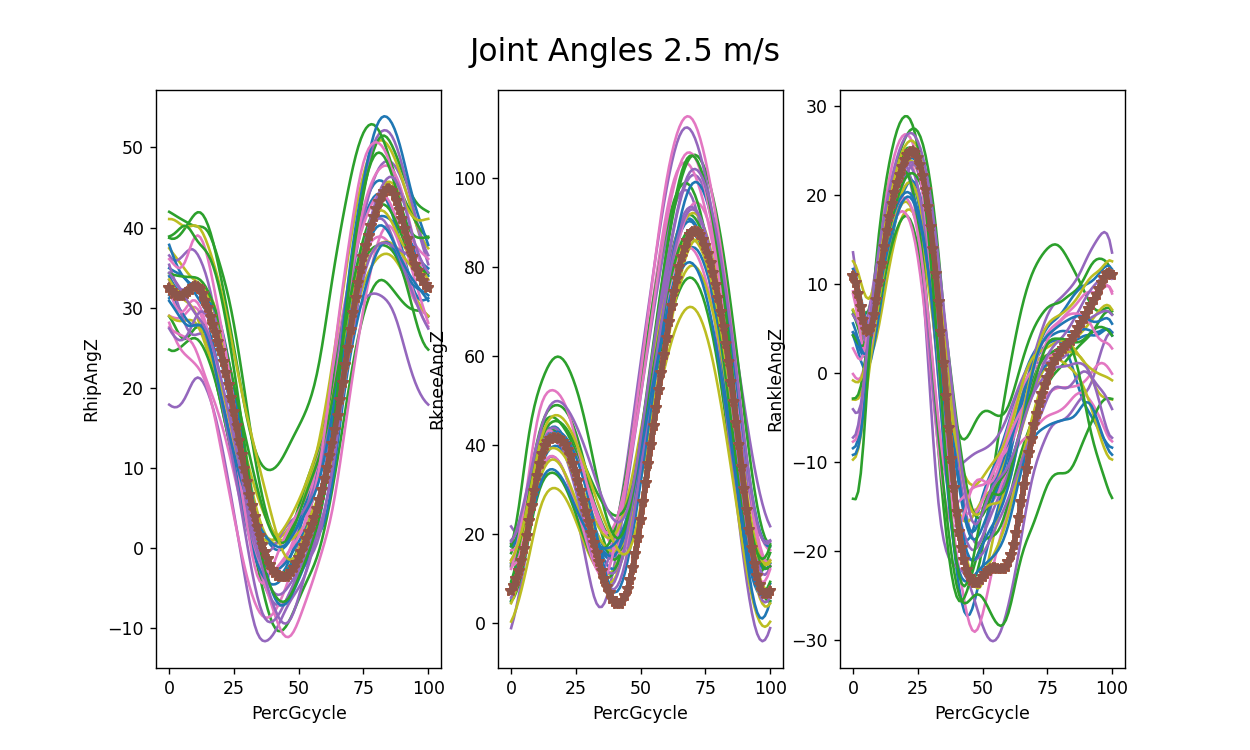

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Angles 2.5 m/s", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for f, fname in enumerate(fnames):
        df_rbds = pd.read_csv(fname, delimiter='\t', index_col='PercGcycle')
        df_rbds.plot(y='R'+joint+'AngZ25', use_index=True, ax=axs[j], 
                     legend=False, ylabel='R'+joint+'AngZ')
        df_sub.plot(y='R'+joint+'AngZ25', use_index=True, ax=axs[j], 
                     legend=False, style='*-', lw=3)

<IPython.core.display.Javascript object>


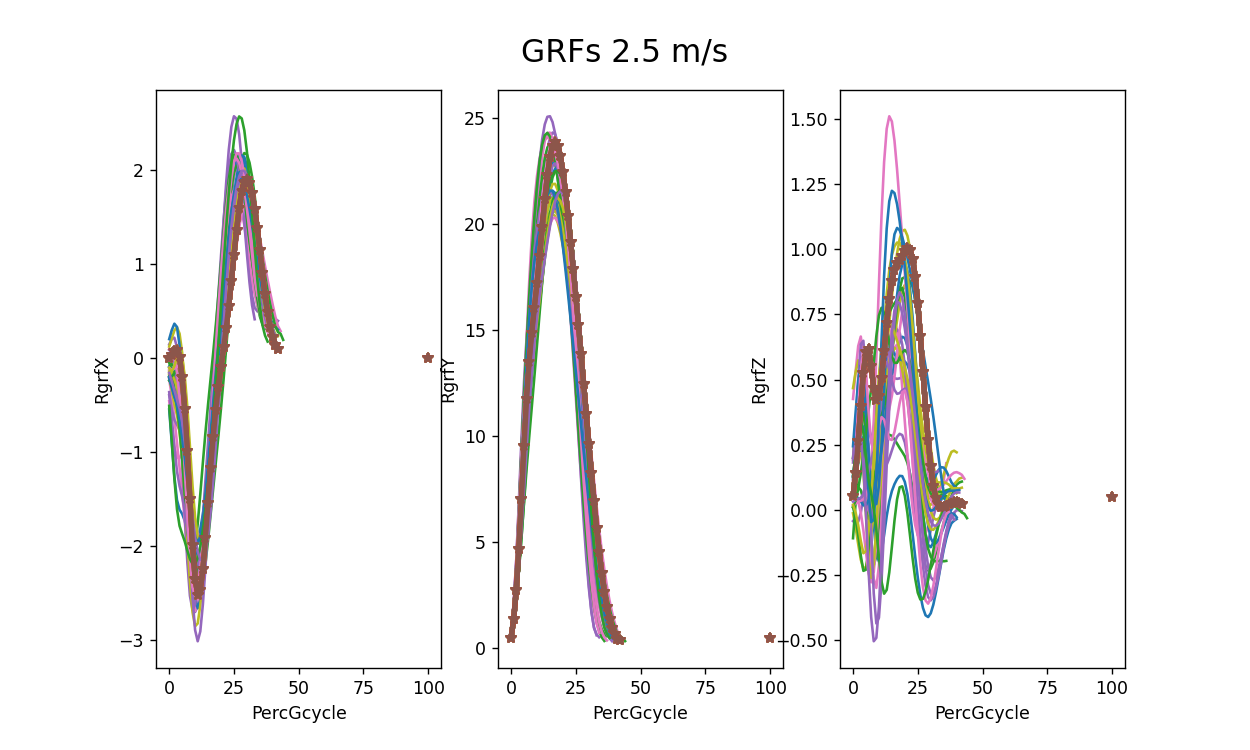

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("GRFs 2.5 m/s", fontsize=18, y=0.95)

for xyz, axes in enumerate(direction):
    for f, fname in enumerate(fnames):
        df_rbds = pd.read_csv(fname, delimiter='\t', index_col='PercGcycle')
        df_rbds.plot(y='Rgrf'+axes+'25', use_index=True, ax=axs[xyz], 
                     legend=False, ylabel='Rgrf'+axes)
        df_sub.plot(y='Rgrf'+axes+'25', use_index=True, ax=axs[xyz], 
                     legend=False, style='*-', lw=3)

### 3.5 m/s

<IPython.core.display.Javascript object>


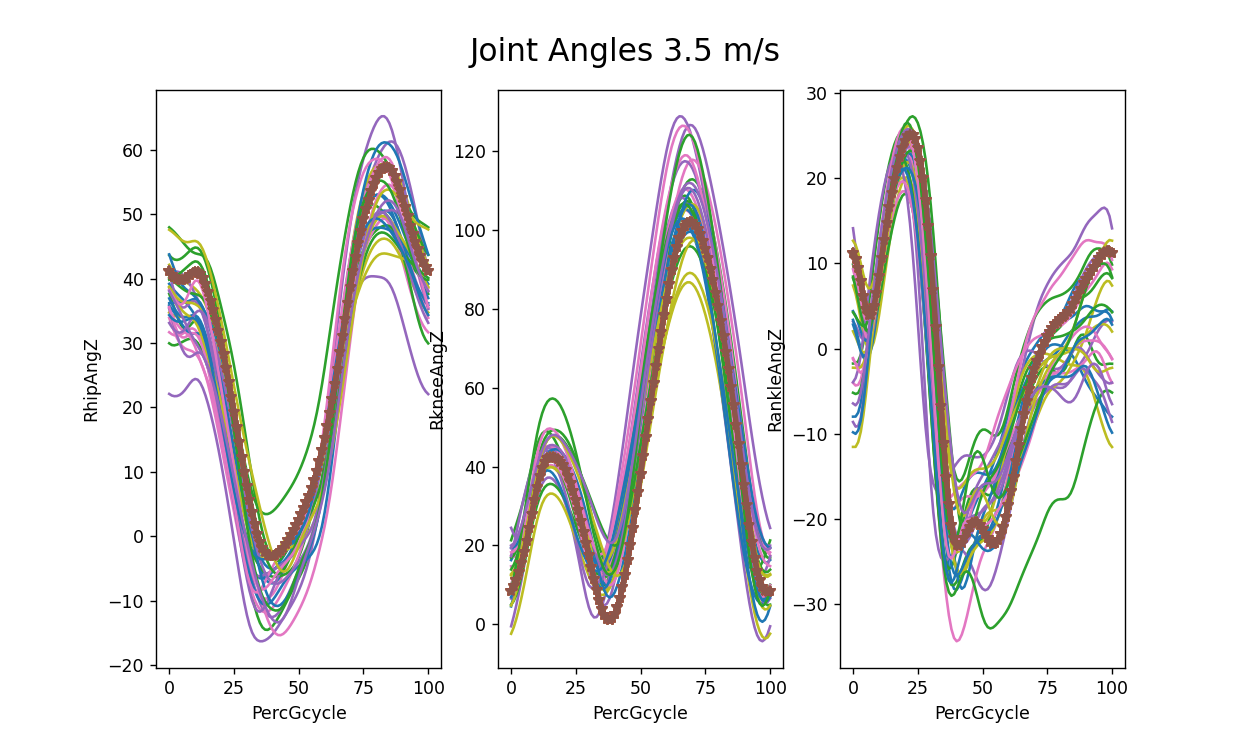

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Angles 3.5 m/s", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for f, fname in enumerate(fnames):
        df_rbds = pd.read_csv(fname, delimiter='\t', index_col='PercGcycle')
        df_rbds.plot(y='R'+joint+'AngZ35', use_index=True, ax=axs[j], 
                     legend=False, ylabel='R'+joint+'AngZ')
        df_sub.plot(y='R'+joint+'AngZ35', use_index=True, ax=axs[j], 
                     legend=False, style='*-', lw=3)

<IPython.core.display.Javascript object>


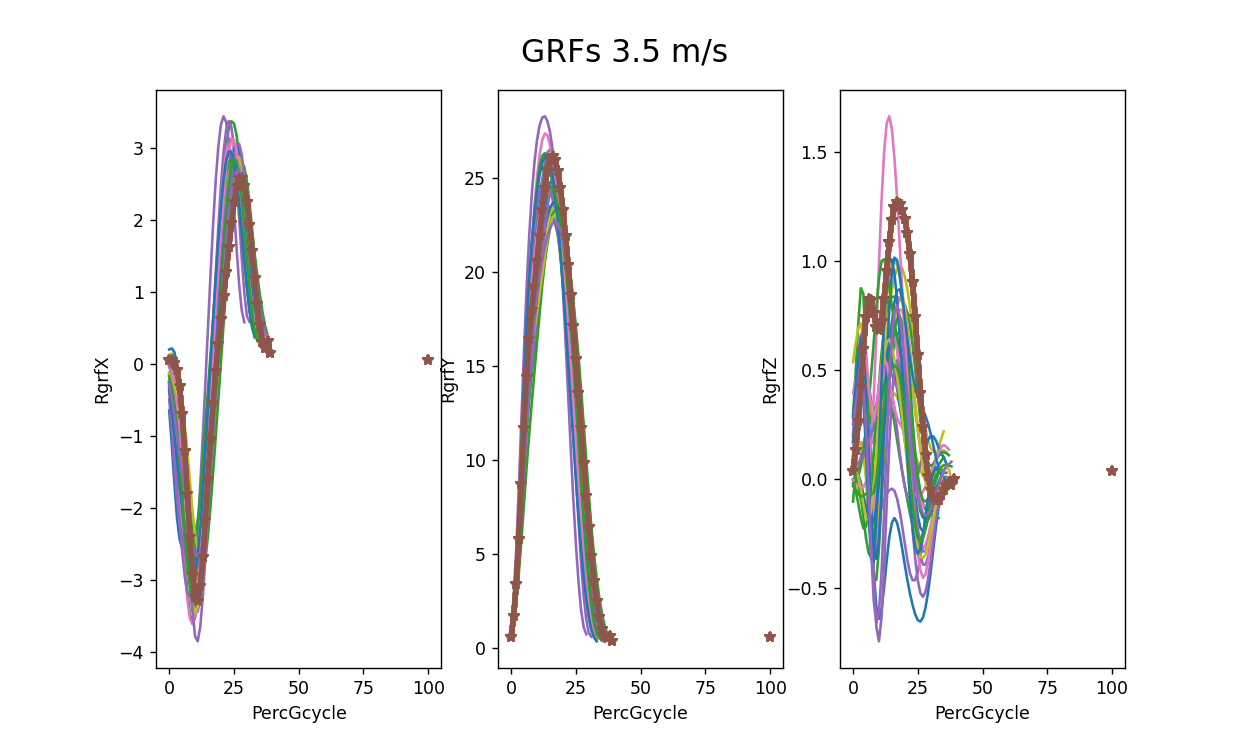

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("GRFs 3.5 m/s", fontsize=18, y=0.95)

for xyz, axes in enumerate(direction):
    for f, fname in enumerate(fnames):
        df_rbds = pd.read_csv(fname, delimiter='\t', index_col='PercGcycle')
        df_rbds.plot(y='Rgrf'+axes+'35', use_index=True, ax=axs[xyz], 
                     legend=False, ylabel='Rgrf'+axes)
        df_sub.plot(y='Rgrf'+axes+'35', use_index=True, ax=axs[xyz], 
                     legend=False, style='*-', lw=3)

### 4.5 m/s

<IPython.core.display.Javascript object>


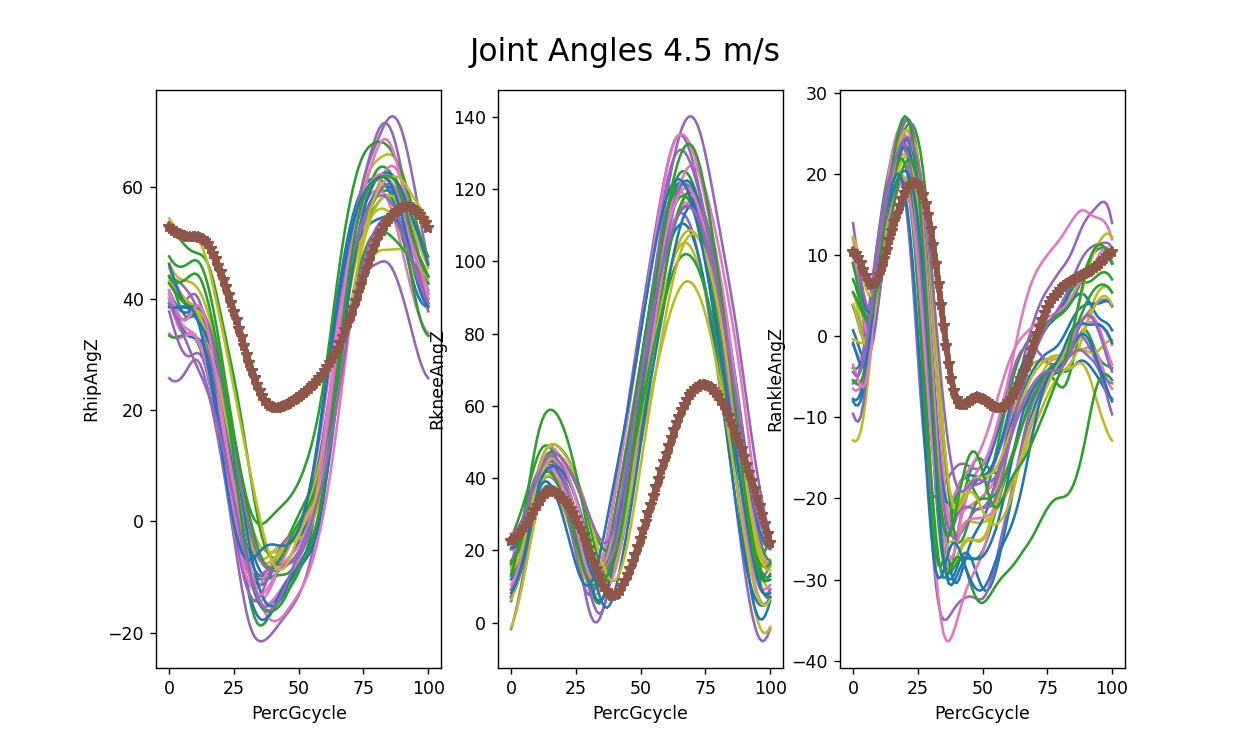

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Joint Angles 4.5 m/s", fontsize=18, y=0.95)

for j, joint in enumerate(joints):
    for f, fname in enumerate(fnames):
        df_rbds = pd.read_csv(fname, delimiter='\t', index_col='PercGcycle')
        df_rbds.plot(y='R'+joint+'AngZ45', use_index=True, ax=axs[j], 
                     legend=False, ylabel='R'+joint+'AngZ')
        df_sub.plot(y='R'+joint+'AngZ45', use_index=True, ax=axs[j], 
                     legend=False, style='*-', lw=3)

<IPython.core.display.Javascript object>


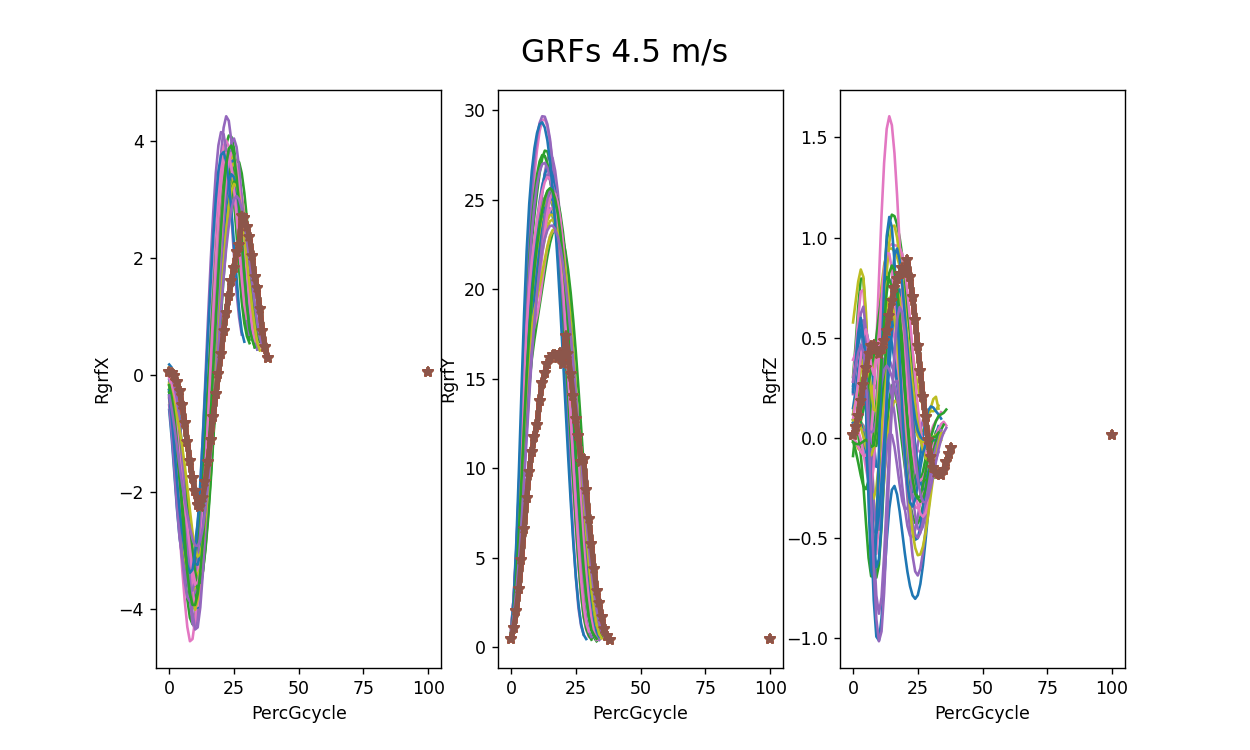

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("GRFs 4.5 m/s", fontsize=18, y=0.95)

for xyz, axes in enumerate(direction):
    for f, fname in enumerate(fnames):
        df_rbds = pd.read_csv(fname, delimiter='\t', index_col='PercGcycle')
        df_rbds.plot(y='Rgrf'+axes+'45', use_index=True, ax=axs[xyz], 
                     legend=False, ylabel='Rgrf'+axes)
        df_sub.plot(y='Rgrf'+axes+'45', use_index=True, ax=axs[xyz], 
                     legend=False, style='*-', lw=3)